In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

# Carregando os dados

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df_out = pd.DataFrame(columns=['NU_INSCRICAO','IN_TREINEIRO'])
df_out['NU_INSCRICAO'] = test['NU_INSCRICAO']
train.drop(['Q027', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO'], axis=1, inplace=True)
test.drop(['Q027', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO'], axis=1, inplace=True)

## Tornando os dois dataframes iguais

In [3]:
columns = list(set(train.columns) & set(test.columns))
train = train[columns+['IN_TREINEIRO']]

In [4]:
completa_zero = ['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','NU_NOTA_LC']
train.loc[train[train['TP_PRESENCA_LC']== 0].index, completa_zero] = 0
train.loc[train[train['TP_PRESENCA_LC']== 2].index, completa_zero] = 0
test.loc[test[test['TP_PRESENCA_LC']== 0].index, completa_zero] = 0
test.loc[test[test['TP_PRESENCA_LC']== 2].index, completa_zero] = 0

In [5]:
train.loc[train[train['TP_PRESENCA_LC']== 0].index, 'TP_STATUS_REDACAO'] = 4
train.loc[train[train['TP_PRESENCA_LC']== 2].index,'TP_STATUS_REDACAO'] = 2
test.loc[test[test['TP_PRESENCA_LC']== 0].index,'TP_STATUS_REDACAO'] = 4
test.loc[test[test['TP_PRESENCA_LC']== 2].index,'TP_STATUS_REDACAO'] = 2

In [6]:
train.loc[train[train['TP_PRESENCA_CH']== 0].index,'NU_NOTA_CH'] = 0
train.loc[train[train['TP_PRESENCA_CH']== 2].index, 'NU_NOTA_CH'] = 0
test.loc[test[test['TP_PRESENCA_CH']== 0].index, 'NU_NOTA_CH'] = 0
test.loc[test[test['TP_PRESENCA_CH']== 2].index, 'NU_NOTA_CH'] = 0

## Observando as características dos dados

In [7]:

train.loc[train[train['TP_PRESENCA_CN']== 0].index, 'NU_NOTA_CN'] = 0
train.loc[train[train['TP_PRESENCA_CN']== 2].index, 'NU_NOTA_CN'] = 0
test.loc[test[test['TP_PRESENCA_CN']== 0].index, 'NU_NOTA_CN'] = 0
test.loc[test[test['TP_PRESENCA_CN']== 2].index, 'NU_NOTA_CN'] = 0

In [8]:
train['TP_SEXO'] = pd.get_dummies(train['TP_SEXO'], drop_first=1)
test['TP_SEXO'] = pd.get_dummies(test['TP_SEXO'], drop_first=1)

In [9]:
def converte_var_categoricas(data):
    i=0
    category_features = data.select_dtypes(include='object').columns
    for col_category in category_features:
        le = LabelEncoder()
        data[col_category] = le.fit_transform(data[col_category])
        i+=1
    return data

train = converte_var_categoricas(train)
test = converte_var_categoricas(test)

In [10]:

train.head()

,IN_SABATISTA,Q024,IN_GESTANTE,IN_IDOSO,Q047,TP_SEXO,NU_NOTA_REDACAO,NU_IDADE,TP_PRESENCA_CN,IN_BAIXA_VISAO,...,IN_DISCALCULIA,Q025,TP_PRESENCA_CH,NU_NOTA_COMP3,NU_NOTA_LC,TP_COR_RACA,NU_NOTA_COMP4,Q026,TP_PRESENCA_MT,IN_TREINEIRO
0,0,0,0,0,0,1,520.0,24,1,0,...,0,0,1,120.0,581.2,1,80.0,2,1,0
1,0,0,0,0,0,0,580.0,17,1,0,...,0,0,1,120.0,599.0,3,120.0,0,1,0
2,0,0,0,0,0,0,0.0,21,0,0,...,0,0,0,0.0,0.0,3,0.0,0,0,0
3,0,2,0,0,3,0,0.0,25,0,0,...,0,1,0,0.0,0.0,0,0.0,2,0,0
4,0,0,0,0,0,1,0.0,28,0,0,...,0,0,0,0.0,0.0,2,0.0,1,0,0


In [11]:
train.describe()

,IN_SABATISTA,Q024,IN_GESTANTE,IN_IDOSO,Q047,TP_SEXO,NU_NOTA_REDACAO,NU_IDADE,TP_PRESENCA_CN,IN_BAIXA_VISAO,...,IN_DISCALCULIA,Q025,TP_PRESENCA_CH,NU_NOTA_COMP3,NU_NOTA_LC,TP_COR_RACA,NU_NOTA_COMP4,Q026,TP_PRESENCA_MT,IN_TREINEIRO
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,...,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000
mean,0.009687,0.671449,0.000947,0.000146,0.398762,0.381573,390.447633,21.593809,0.754479,0.001238,...,0.000073,0.569192,0.754479,78.838310,381.166737,2.185652,83.487618,0.693445,0.738747,0.129862
std,0.097947,0.726335,0.030757,0.012069,1.027900,0.485790,267.749316,7.043654,0.431932,0.035167,...,0.008534,0.495207,0.431932,55.469523,234.648409,1.007285,57.460251,0.806536,0.440162,0.336163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,480.000000,19.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,100.000000,486.000000,3.000000,100.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,580.000000,23.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,120.000000,548.300000,3.000000,120.000000,1.000000,1.000000,0.000000
max,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1000.000000,67.000000,2.000000,1.000000,...,1.000000,1.000000,2.000000,200.000000,763.600000,5.000000,200.000000,2.000000,2.000000,1.000000


## Desproporcionalidade nas características alvo

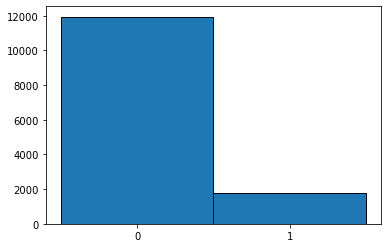

In [12]:
plt.hist(train.IN_TREINEIRO,bins=[-.5,.5,1.5],ec='k')
plt.xticks((0,1))
plt.show()

## Mapa de correlação das variáveis pré tratamento

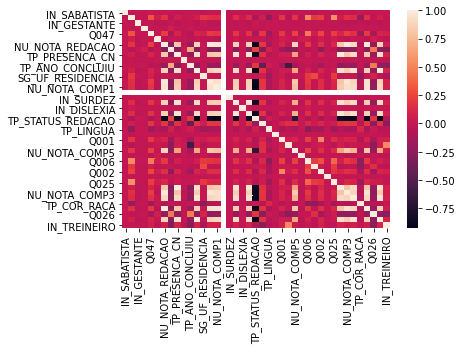

In [13]:
corr= train.corr()
sns.heatmap(corr)

## Codificando as variavéis categóricas



In [14]:
def converte_var_categoricas(data):
    le = []
    i=0
    category_features = data.select_dtypes(include='object').columns
    for col_category in category_features:
        le.append(LabelEncoder())
        data[col_category] = le[i].fit_transform(data[col_category])
        i+=1
    return data

train = converte_var_categoricas(train)
test = converte_var_categoricas(test)

In [15]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

## Faremos o balanceamento do dataset durante a própria implementação


In [16]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

Using TensorFlow backend.
C:\Users\Weslley\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Weslley\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Weslley\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Weslley\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [66]:
y = train['IN_TREINEIRO']
X = train[['NU_IDADE','TP_ST_CONCLUSAO']]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
#y = y.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12)

In [67]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)


In [68]:
bbc.fit(X_train, y_train)


BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                class_weight=None,
                                                                criterion='gini',
                                                                max_depth=None,
                                                                max_features=None,
                                                                max_leaf_nodes=None,
                                                                min_impurity_decrease=0.0,
                                                                min_impurity_split=None,
                                                                min_samples_leaf=1,
                                                                min_samples_split=2,
                                                                min_weight_fraction_leaf=0.0,
                                                                p

In [69]:
bbc.score(X_test,y_test)

0.9845616079230993

In [70]:
X_final = test[['NU_IDADE','TP_ST_CONCLUSAO']]
X_final = scaler.transform(X_final)
previsao = bbc.predict(X_final)

In [71]:
df_out['IN_TREINEIRO'] = previsao

In [72]:
df_out.to_csv('answer.csv',index=False)